<Info | 7 non-empty values
 bads: []
 ch_names: Arduino Data
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 9600.0 Hz
 meas_date: 2021-04-08 21:17:13 UTC
 nchan: 1
 projs: []
 sfreq: 19200.0 Hz
>
[[3.73310262e-04 1.93171128e-04 5.30831400e-05 ... 2.73273421e-04
  2.83316549e-04 3.23337354e-04]]
3840


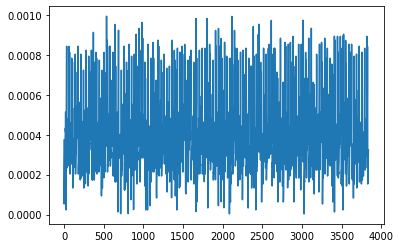

In [1]:
#adapted from code by paulvangent @ P.vanGent@tudelft.nl
#data is from arduino
import matplotlib.pyplot as plt
import numpy as np
import heartpy as hp

import os
import pandas as pd
import scipy.signal
import mne

file = "/Users/mary-jo.ajiduah/Desktop/ECGnew/ecgReading1.edf"
data = mne.io.read_raw_edf(file, preload=True, stim_channel='auto', verbose=False)
raw_data = data.get_data()
print(data.info)

# print raw data
print(raw_data)

# plot raw data
sfreq = data.info['sfreq']
noCol = len(raw_data[0]) # how many data points there are in channel we are looking at
print(noCol)
ecg = raw_data[0]
plt.plot(ecg)

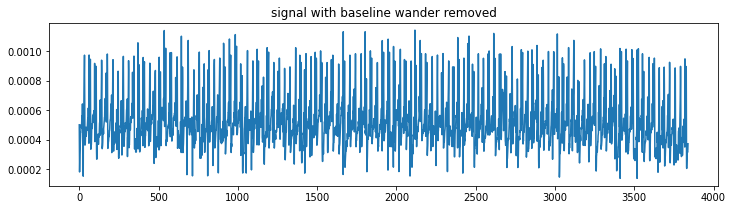

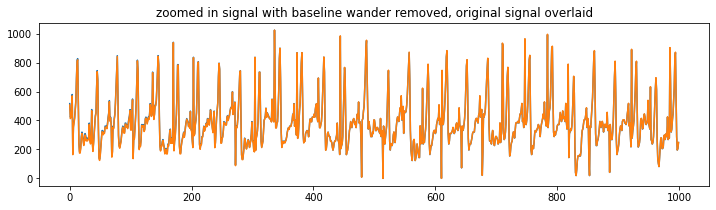

In [2]:
def filter_and_visualise(data, sample_rate):
    '''
    function that filters using remove_baseline_wander 
    and visualises result
    '''
    
    filtered = hp.remove_baseline_wander(data, sample_rate)

    plt.figure(figsize=(12,3))
    plt.title('signal with baseline wander removed')
    plt.plot(filtered)
    plt.show()

    #And let's plot both original and filtered signal, and zoom in to show peaks are not moved
    #We'll also scale both signals with hp.scale_data
    #This is so that they have the same amplitude so that the overlap is better visible
    plt.figure(figsize=(12,3))
    plt.title('zoomed in signal with baseline wander removed, original signal overlaid')
    plt.plot(hp.scale_data(data[200:1200]))
    plt.plot(hp.scale_data(filtered[200:1200]))
    plt.show()
    
    return filtered

filtered = filter_and_visualise(ecg, sfreq)